# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# sample size -130 
len(df)

130

#### Q2: Is the sample size large? Are the observations independent?
Sample size > 30 and sufficiently large for CLT. Samples are independent because they are taken from different people.

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

#### Q1: Is the distribution of body temperatures normal?¶

In [6]:
df.temperature.unique()

array([  99.3,   98.4,   97.8,   99.2,   98. ,   98.8,   98.6,   96.7,
         98.2,   98.7,   98.3,   97.2,   99.4,   98.1,   97.6,   98.5,
         99.5,   99.1,   97.9,   96.4,   96.9,   99. ,   97.4,   97.1,
         98.9,   97.7,   97.5,  100. ,   96.8,   99.9,   97. ,   97.3,
        100.8,   96.3])

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy.stats import norm
import scipy.stats
import math

Constructing a histogram and visually to see if the distribution is a Normal curve.

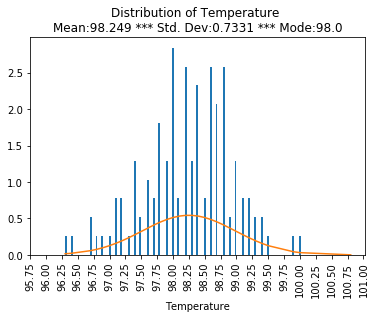

In [8]:
temp_obs = df.temperature.sort_values()
bin_values = np.arange(start=temp_obs.min(), stop=temp_obs.max(), step=.03)
mu, std = temp_obs.mean(),temp_obs.std()
p=norm.pdf(temp_obs,mu,std)
plt.hist(temp_obs,bins=bin_values,normed=True, stacked=True)
plt.plot(temp_obs, p)
plt.xlabel('Temperature')
xticks = plt.xticks(np.arange(95.75,101.25,0.25), rotation=90)
plt.title(('Distribution of Temperature \nMean:'+('{:3.6}'.format(str(mu)))+
           ' *** Std. Dev:'+('{:1.6}'.format(str(std)))+
          ' *** Mode:'+('{:3.6}'.format(str(temp_obs.mode().values[0])))))

Now, let us check if the observations follow a Normal distribution using normaltest from

In [9]:
k2,p=scipy.stats.normaltest(temp_obs)
if p < 0.05:
    print(p, "is not Normal Distribution")
else:
    print(p, "is Normal Distribution")

0.258747986349 is Normal Distribution


#### Q3: Is the true population mean really 98.6 degrees F?

Ho: True Population Mean is 98.6 F H1: True Population Mean is not 98.6 F

One sample test is appropriate to use since a set of temperatures will be tested against the population mean of 98.6 F. Z-statistic is appropriate to use in this case since sample size>30. If calculated p_value is < assumed p_value of 0.05, then Ho will be rejected.

In [10]:
# Calculate t- value  (t-value= signal/noise)
mean=df.temperature.mean()
std=df.temperature.std()
median=df.temperature.median()
sample_size=df.temperature.size

signal=mean-98.6
noise=std/(sample_size**0.5)
z_val=signal/noise
z_val

-5.454823292364079

#### This tells us that sample mean of 98.25 F is 5.18 standard error units below the assumed population mean of 98.6 F¶

In [11]:
# Probability that True Mean is within 5.45 std of 98.25 F
import scipy.stats as stats
P_value=stats.norm.cdf(z_val) * 2       # two sided
P_value

4.9021570141133797e-08

In [13]:
P_value=stats.norm.sf(abs(z_val))*2       #twosided same formula as In[60]
if P_value<0.05:
    print('Ho must be rejected. True Population Mean is NOT 98.6 F')
else:
    print('Ho is True.  True Population mean is 98.6 F.')

Ho must be rejected. True Population Mean is NOT 98.6 F



#### Comparing Z-statistic and t-statistic


In [14]:
t_val=signal/noise       # n=130, df=129
t_val

-5.454823292364079

In [15]:
#Calculate critical t-value
# n=130, p<0.05, 2-tail
critical_t=stats.t.ppf(1-0.025, 129)
critical_t

1.9785244914586051

In [16]:
moe_t=critical_t*std/np.sqrt(130)
critical_z=stats.norm.ppf(0.975)
moe_z=std*critical_z/np.sqrt(130)
mean_z1=mean+moe_z
mean_z2=mean-moe_z
mean_t1=mean+moe_t
mean_t2=mean-moe_t
print("Using z-statistic with 95% confindence level, range of true mean is ", round(mean_z2,2), " F to ", round(mean_z1,2), " F.")
print("Using t-statistic with 95% confindence level, range of true mean is ", round(mean_t2,2), " F to ", round(mean_t1,2), " F.")

Using z-statistic with 95% confindence level, range of true mean is  98.12  F to  98.38  F.
Using t-statistic with 95% confindence level, range of true mean is  98.12  F to  98.38  F.


#### Q4: At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval. The result means 98.6 F is considered ABNORMAL

In [20]:
moe_z = 1.96 * std/ np.sqrt(130)
ci = mean + np.array([-1, 1]) * moe_z
print(ci)
print("Normal temperature range is ", round(mean_z2,2), " F to ", round(mean_z1,2), " F. Outside this range is ABNORMAL!")


[ 98.12319411  98.37526743]
Normal temperature range is  98.12  F to  98.38  F. Outside this range is ABNORMAL!


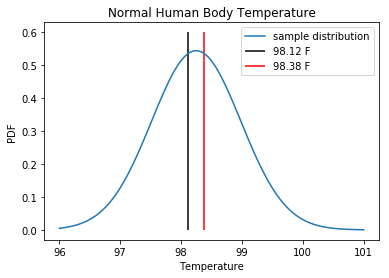

In [21]:
import pylab
x = np.linspace(96,101,130)
y = stats.norm.pdf(x, loc=mean, scale=std)    
pylab.plot(x,y)

pylab.xlabel('Temperature')
pylab.ylabel('PDF')
pylab.vlines(mean_t2,0, 0.6)
pylab.vlines(mean_t1,0,0.6,color='red')

pylab.legend(['sample distribution','98.12 F', '98.38 F'])
pylab.title('Normal Human Body Temperature')

#### Q5: Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

In [24]:
# Male Temperatures
men=df[df.gender=='M']
print(men.shape)
men.head()

(65, 3)


,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0


In [25]:
men_mean_temp=men.temperature.mean()
print(men_mean_temp)

men_std_temp=men.temperature.std()
print(men_std_temp)

98.1046153846154
0.6987557623265908


In [26]:
#Female Temperatures
fem=df[df.gender=='F']
print(fem.shape)
fem.head()

(65, 3)


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0


In [27]:
fem_mean_temp=fem.temperature.mean()
print(fem_mean_temp)

fem_std_temp=fem.temperature.std()
print(fem_std_temp)

98.39384615384613
0.7434877527313665


In [30]:
# Diference in mean of Male and Female temperatures
mean_diff=fem_mean_temp - men_mean_temp
print("Mean difference is:", mean_diff)

# Standard Error Calculation
SE=((men_std_temp**2)/65 + (fem_std_temp**2)/65)**0.5
print("Standard error is:", SE)

Mean difference is: 0.289230769230727
Standard error is: 0.12655395041982642


In [31]:
# Use 0.05 Significance level in two sample t-test
t_val=((fem_mean_temp-men_mean_temp)-0)/SE
print(t_val)

# two-sided pvalue = Prob(abs(t)>tt)
p_value = stats.t.sf(np.abs(2.29), 128)*2  
print(p_value)

2.285434538165274
0.023657711289


In [32]:
if p_value < 0.05:
    print('Ho that mean of female and male temperature are the same will be rejected.')
    print('There is significance difference between male and female body temperatures.')
else: 
    print('Ho: Mean of female and amle temperature are the same IS TRUE!')

Ho that mean of female and male temperature are the same will be rejected.
There is significance difference between male and female body temperatures.


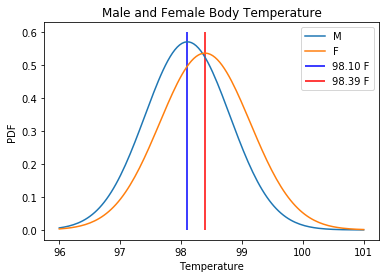

In [33]:
# Normal Distribution graph of Male and Female Temperatures

x = np.linspace(96,101,130)
y1 = stats.norm.pdf(x, loc=men_mean_temp, scale=men_std_temp)    
pylab.plot(x,y1)

y2 = stats.norm.pdf(x, loc=fem_mean_temp, scale=fem_std_temp)    
pylab.plot(x,y2)
pylab.xlabel('Temperature')
pylab.ylabel('PDF')
pylab.vlines(men_mean_temp,0, 0.6, color='blue')
pylab.vlines(fem_mean_temp,0,0.6, color='red')
pylab.legend(['M', 'F', '98.10 F', '98.39 F'])
pylab.title('Male and Female Body Temperature')
pylab.show()